# **HEART DISEASE PREDICTION**

**DATASET FROM :** [KAGGLE "Heart Disease Dataset"](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

**1. IMPORTING LIBRARIES**


In [85]:
import pandas as pwd

**2. IMPORTING THE DATASET INTO PROJECT**

In [86]:
data = pwd.read_csv('heart.csv')

In [87]:
# Checking for NULL Values within the dataset
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [88]:
# Removing Duplicated Values fron Dataset
duplicated = data.duplicated().any()
duplicated

True

In [89]:
data = data.drop_duplicates()

In [90]:
# Checking for Duplicated Values
duplicated = data.duplicated().any()
duplicated

False

```
Here we got no NULL Values present in the dataset because we've already removed them in previous code
```

**3. PROCESSING THE DATASET**

In [91]:
valued = []
numeric = []

for column in data.columns:
  if data[column].nunique() <=10:
    valued.append(column)
  else:
    numeric.append(column)

In [92]:
# colums which contains string type values
valued

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [93]:
# columns which contains numeric type values
numeric

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 302 entries, 0 to 878
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       302 non-null    int64  
 1   sex       302 non-null    int64  
 2   cp        302 non-null    int64  
 3   trestbps  302 non-null    int64  
 4   chol      302 non-null    int64  
 5   fbs       302 non-null    int64  
 6   restecg   302 non-null    int64  
 7   thalach   302 non-null    int64  
 8   exang     302 non-null    int64  
 9   oldpeak   302 non-null    float64
 10  slope     302 non-null    int64  
 11  ca        302 non-null    int64  
 12  thal      302 non-null    int64  
 13  target    302 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 35.4 KB


In [95]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [96]:
data.shape

(302, 14)

**4. FEATURE SCALING**

In [97]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [98]:
data[numeric] = scaler.fit_transform(data[numeric])

In [99]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,-0.267966,1,0,-0.376556,-0.667728,0,1,0.806035,0,-0.037124,2,2,3,0
1,-0.157260,1,0,0.478910,-0.841918,1,0,0.237495,1,1.773958,0,0,3,0
2,1.724733,1,0,0.764066,-1.403197,0,1,-1.074521,1,1.342748,0,0,3,0
3,0.728383,1,0,0.935159,-0.841918,0,1,0.499898,0,-0.899544,2,1,3,0
4,0.839089,0,0,0.364848,0.919336,1,1,-1.905464,0,0.739054,1,3,2,0


**5. SPLITTING THE DATA SET**

In [100]:
x = data.drop('target',axis=1)
y = data['target']

In [101]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [102]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
245,-1.153610,1,1,-0.091401,-0.532247,0,0,1.680713,0,-0.899544,2,0,2
349,0.839089,0,2,-0.091401,0.319348,0,1,-2.299069,0,0.135360,1,1,3
135,0.396267,0,0,2.189843,-0.416120,1,0,-0.156110,1,1.515232,1,2,1
389,0.949794,1,3,0.764066,-0.261285,1,0,0.018826,0,1.084022,0,0,1
66,-0.157260,1,2,-0.091401,-0.958045,1,0,0.106294,0,0.135360,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,1.724733,1,1,1.391408,-0.029032,0,0,-0.287311,0,-0.899544,2,0,2
123,1.171205,0,2,0.478910,3.299932,1,0,0.324963,0,-0.209608,2,1,2
739,-0.267966,1,0,-0.205463,0.164513,0,1,0.499898,1,-0.899544,2,1,3
274,1.281911,1,0,1.619532,-0.358057,0,0,-0.505981,0,1.084022,2,0,1


In [103]:
y_test

245    1
349    0
135    0
389    1
66     1
      ..
402    1
123    1
739    0
274    1
256    1
Name: target, Length: 61, dtype: int64

**6. LOGISTIC REGRESSION**

In [104]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [105]:
y_pred = lr.predict(x_test)

In [106]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7868852459016393

**7. SUPPORT VECTOR CLASSIFIER**

In [107]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)

SVC()

In [108]:
y_pred2 = svc.predict(x_test)

In [109]:
accuracy_score(y_test,y_pred2)

0.8360655737704918

**8. K-NEAREST NEIGHBOUR**

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [111]:
y_pred3 = knn.predict(x_test)

In [112]:
accuracy_score(y_test,y_pred3)

0.7377049180327869

```
score=[]
for k in range(1,30):
 knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred = knn.predict(x_test)
  score.append(accuracy_score(y_test,y_pred))
  ```

In [113]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(x_train,y_train)
y_pred = knn.predict(x_test)
accuracy_score(y_test,y_pred)

0.819672131147541

**9. RANDOM FOREST CLASSIFIER**

In [114]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [115]:
y_pred4 = rf.predict(x_test)
accuracy_score(y_test,y_pred)

0.819672131147541

**10. GRADIENT BOOSTING CLASSIFIER**

In [116]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)
y_pred5=gbc.predict(x_test)
accuracy_score(y_test,y_pred5)

0.8032786885245902

**FINAL DATA**

In [117]:
final_data =  pwd.DataFrame({'Models':['Logistic Regression','Support Vector Classifier','K-Nearest Neighbour','Random Forest Classifier','Gradient Boosting Classifier'],'Accuracy':[accuracy_score(y_test,y_pred),
                                                                                                                                                                                     accuracy_score(y_test,y_pred2),
                                                                                                                                                                                     accuracy_score(y_test,y_pred3),
                                                                                                                                                                                     accuracy_score(y_test,y_pred4),
                                                                                                                                                                                     accuracy_score(y_test,y_pred5),]})
final_data

,Models,Accuracy
0,Logistic Regression,0.819672
1,Support Vector Classifier,0.836066
2,K-Nearest Neighbour,0.737705
3,Random Forest Classifier,0.852459
4,Gradient Boosting Classifier,0.803279


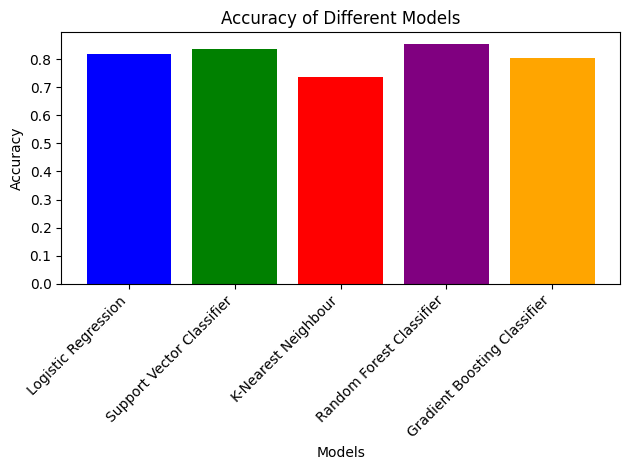

In [118]:
import matplotlib.pyplot as plt
plt.bar(final_data['Models'], final_data['Accuracy'], color=['blue', 'green', 'red', 'purple', 'orange'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
